Seaborn

Seaborn is a plotting library for making really pretty plots

In [10]:
%matplotlib inline

In [11]:
import pandas

In [12]:
import seaborn

In [13]:
def dateparse(x):
    try:
        return pandas.datetime.strptime(x, '%d/%m/%Y')
    except ValueError:
        pass
    try:
        return pandas.datetime.strptime(x, '%d-%y')
    except ValueError:
        pass
    if "-" in x:
        (lhs, rhs) = x.split('-',1)
        return dateparse(rhs)


In [14]:
all_trains = pandas.read_csv('sydtrains.csv',index_col=1,parse_dates=['SURVEY_DATE_USED'],date_parser=dateparse,thousands=',')
all_trains
trains=all_trains[all_trains.YEAR ==2014].copy()
trains

#thousands = ',' to make string into integer

LINE  YEAR SURVEY_DATE_USED  \
STATION                                                                        
Central                                           CBD  2014       2014-05-06   
Town Hall                                         CBD  2014       2014-05-07   
Wynyard                                           CBD  2014       2014-05-20   
Parramatta                                    Western  2014       2014-11-19   
North Sydney                              North Shore  2014       2014-08-19   
Redfern                                           CBD  2014       2014-05-01   
Chatswood                                 North Shore  2014       2014-08-19   
Bondi Junction                        Eastern Suburbs  2014       2014-09-02   
Strathfield                                Inner West  2014       2014-09-09   
Circular Quay                                     CBD  2014       2014-05-22   
Martin Place                                      CBD  2014       2014-05-27   
Hurstville                                  Illawarra  2014       2014-05-28   
St Leonards                               North Shore  2014       2014-05-27   
Blacktown                                     Western  2014       2014-10-14   
Burwood                                    Inner West  2014       2014-09-09   
Kings Cross                           Eastern Suburbs  2014       2013-09-03   
Hornsby                                   North Shore  2014       2014-05-14   
Ashfield                                   Inner West  2014       2013-09-04   
Kogarah                                     Illawarra  2014       2014-06-19   
Lidcombe                                        South  2014       2014-06-05   
Auburn                                        Western  2014       2014-11-19   
Museum                                            CBD  2014       2014-05-22   
Epping                       Northern via Strathfield  2014       2014-05-21   
Macquarie University      Northern via Macquarie Park  2014       2014-05-21   
St James                                          CBD  2014       2014-05-27   
Rockdale                                    Illawarra  2014       2014-05-28   
Cabramatta                                      South  2014       2014-06-11   
Bankstown                                   Bankstown  2014       2014-05-13   
Liverpool                                       South  2014       2014-06-04   
Sutherland                                  Illawarra  2014       2014-06-12   
...                                               ...   ...              ...   
Menangle Park                      Southern Highlands  2014       2014-06-19   
Port Kembla North                         South Coast  2014       2014-09-18   
Scone                                          Hunter  2014       2009-06-03   
Tarro                                          Hunter  2014       2009-06-03   
Aberdeen                                       Hunter  2014       2009-06-03   
Bombo                                     South Coast  2014       2014-09-18   
Branxton                                       Hunter  2014       2009-06-03   
Burradoo                           Southern Highlands  2014       2010-05-25   
Coalcliff                                 South Coast  2014       2012-08-09   
Dunmore (Shellharbour)                    South Coast  2014       2014-06-18   
Exeter                             Southern Highlands  2014       2010-05-25   
Greta                                          Hunter  2014       2009-06-03   
Linden                                 Blue Mountains  2014       2014-08-19   
Marulan                            Southern Highlands  2014       2014-06-17   
Menangle                           Southern Highlands  2014       2014-06-17   
Paterson                                       Hunter  2014       2009-06-03   
Scarborough                               South Coast  2014       2013-08-22   
Tallong                            Southern Highl

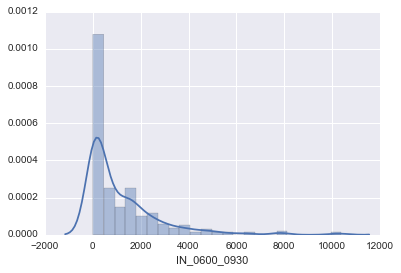

In [15]:
seaborn.distplot(trains.IN_0600_0930)

(<matplotlib.figure.Figure at 0x11c822290>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c58bf50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cad4ed0>], dtype=object))

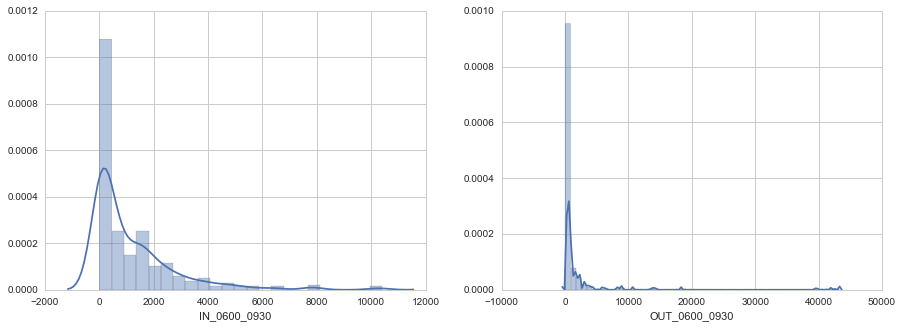

In [22]:
import matplotlib.pyplot
with seaborn.axes_style('whitegrid'):
    fig, axes = matplotlib.pyplot.subplots(1,2,figsize=(15,5))
    seaborn.distplot(trains.IN_0600_0930, ax=axes[0])
    seaborn.distplot(trains.OUT_0600_0930, ax=axes[1])
fig,axes

In [17]:
matplotlib.pyplot.subplots?

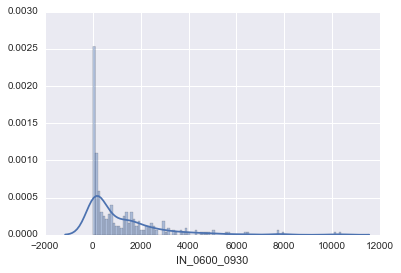

In [23]:
seaborn.distplot(trains.IN_0600_0930,bins=100)

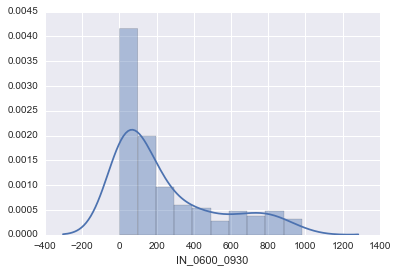

In [27]:
seaborn.distplot(trains.IN_0600_0930[trains.IN_0600_0930<1000],bins=10)

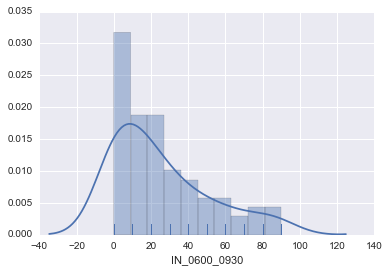

In [30]:
seaborn.distplot(trains.IN_0600_0930[trains.IN_0600_0930<100],bins=10,rug=True)

# *Bivariate analysis

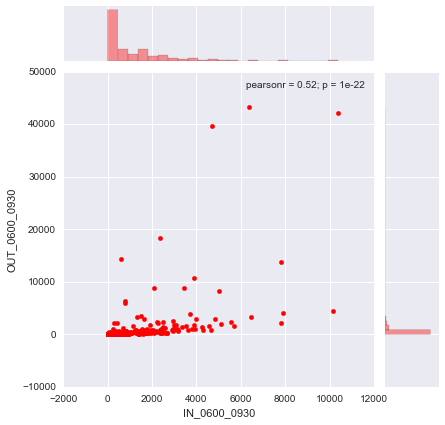

In [34]:
seaborn.jointplot(x="IN_0600_0930",y="OUT_0600_0930" ,data=trains,color='red')

In [35]:
trains.LINE.unique()

array(['CBD', 'Western', 'North Shore', 'Eastern Suburbs', 'Inner West',
       'Illawarra', 'South', 'Northern via Strathfield',
       'Northern via Macquarie Park', 'Bankstown', 'Airport', 'East Hills',
       'Central Coast', 'Olympic Park', 'South Coast', 'Blue Mountains',
       'Newcastle', 'Hunter', 'Carlingford', 'Southern Highlands'], dtype=object)

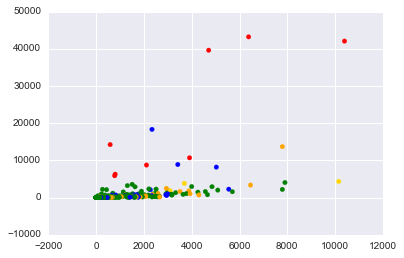

In [41]:
def line_colouring(x):
    if x == "CBD": return 'red'
    if x == 'Western': return 'orange'
    if x == 'North Shore': return 'blue'
    if x == "Eastern Suburbs": return "gold"
    return 'green'
train_colours = trains.LINE.map(line_colouring)
matplotlib.pyplot.scatter(trains.IN_0600_0930,trains.OUT_0600_0930,color=train_colours)

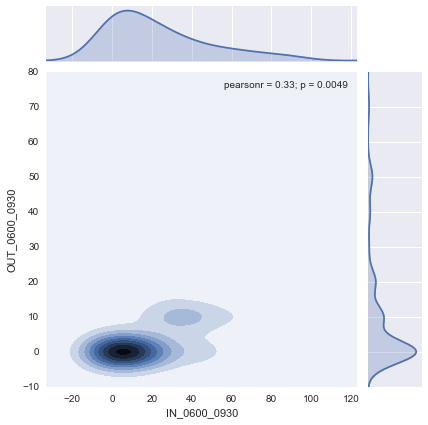

In [76]:
seaborn.jointplot(x = "IN_0600_0930", y="OUT_0600_0930",data=trains[(trains.IN_0600_0930<100) & (trains.OUT_0600_0930 <100)], kind='kde')

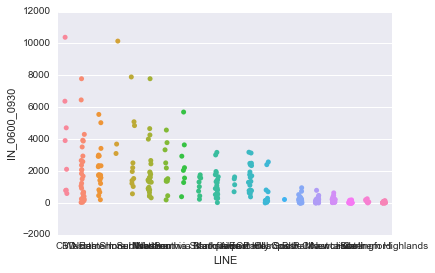

In [111]:
seaborn.stripplot(x = 'LINE', y = 'IN_0600_0930',data=trains,jitter=True)

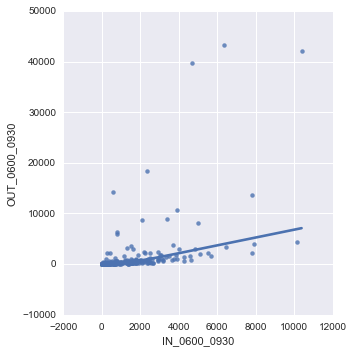

In [147]:
seaborn.lmplot(x="IN_0600_0930", y = "OUT_0600_0930", data=trains, lowess=True)

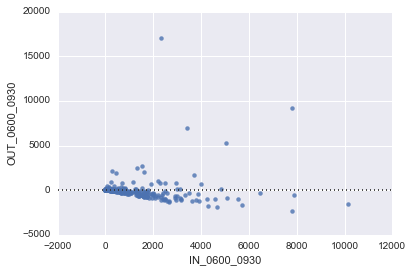

In [141]:
seaborn.residplot(x="IN_0600_0930", y = "OUT_0600_0930", data=trains[trains.LINE!='CBD'])

# Diabetes

In [42]:
import sklearn.datasets
diabetes = sklearn.datasets.load_diabetes()

In [45]:
diabetes.data.shape

(442, 10)

In [46]:
type(diabetes.data)

numpy.ndarray

In [110]:
diabetes.data[0] #First Row

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [104]:
diabetes.data[:,0] #First Column

array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294,  0.00538306,
       -0.09269548, -0.04547248,  0.06350368,  0.04170844, -0.07090025,
       -0.09632802,  0.02717829,  0.01628068,  0.00538306,  0.04534098,
       -0.05273755, -0.00551455,  0.07076875, -0.0382074 , -0.02730979,
       -0.04910502, -0.0854304 , -0.0854304 ,  0.04534098, -0.06363517,
       -0.06726771, -0.10722563, -0.02367725,  0.05260606,  0.06713621,
       -0.06000263, -0.02367725,  0.03444337,  0.03081083,  0.01628068,
        0.04897352,  0.01264814, -0.00914709, -0.00188202, -0.00188202,
        0.00538306, -0.09996055, -0.06000263,  0.01991321,  0.04534098,
        0.02717829, -0.05637009, -0.07816532,  0.06713621, -0.04183994,
        0.03444337,  0.05987114, -0.05273755, -0.00914709, -0.04910502,
       -0.04183994, -0.04183994, -0.02730979,  0.04170844,  0.06350368,
       -0.07090025, -0.04183994, -0.02730979, -0.03457486,  0.06713621,
       -0.04547248, -0.00914709,  0.04170844,  0.03807591,  0.01

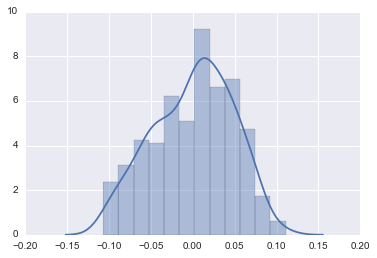

In [48]:
seaborn.distplot(diabetes.data[:,0])

In [64]:
diabetes_df = pandas.DataFrame( data= {'Age': diabetes.data[:,0],'Sex': diabetes.data[:,1],'BMI': diabetes.data[:,2],
                                       'BloodPressure': diabetes.data[:,3],'B1': diabetes.data[:,4],'B2': diabetes.data[:,5],
                                       'B3': diabetes.data[:,6],'B4': diabetes.data[:,7],'B5': diabetes.data[:,8],
                                       'B6': diabetes.data[:,9],'Progression': diabetes.target})


In [65]:
diabetes_df

Age        B1        B2        B3        B4        B5        B6  \
0    0.038076 -0.044223 -0.034821 -0.043401 -0.002592  0.019908 -0.017646   
1   -0.001882 -0.008449 -0.019163  0.074412 -0.039493 -0.068330 -0.092204   
2    0.085299 -0.045599 -0.034194 -0.032356 -0.002592  0.002864 -0.025930   
3   -0.089063  0.012191  0.024991 -0.036038  0.034309  0.022692 -0.009362   
4    0.005383  0.003935  0.015596  0.008142 -0.002592 -0.031991 -0.046641   
5   -0.092695 -0.068991 -0.079288  0.041277 -0.076395 -0.041180 -0.096346   
6   -0.045472 -0.040096 -0.024800  0.000779 -0.039493 -0.062913 -0.038357   
7    0.063504  0.090620  0.108914  0.022869  0.017703 -0.035817  0.003064   
8    0.041708 -0.013953  0.006202 -0.028674 -0.002592 -0.014956  0.011349   
9   -0.070900 -0.012577 -0.034508 -0.024993 -0.002592  0.067736 -0.013504   
10  -0.096328 -0.103389 -0.090561 -0.013948 -0.076395 -0.062913 -0.034215   
11   0.027178 -0.007073  0.045972 -0.065491  0.071210 -0.096433 -0.059067   
12   0.016281 -0.004321 -0.009769  0.044958 -0.039493 -0.030751 -0.042499   
13   0.005383 -0.004321 -0.015719 -0.002903 -0.002592  0.038393 -0.013504   
14   0.045341  0.017694 -0.000061  0.081775 -0.039493 -0.031991 -0.075636   
15  -0.052738  0.089244  0.107662 -0.039719  0.108111  0.036056 -0.042499   
16  -0.005515  0.024574 -0.023861  0.074412 -0.039493  0.052280  0.027917   
17   0.070769  0.034206  0.049416 -0.039719  0.034309  0.027368 -0.001078   
18  -0.038207 -0.037344 -0.019476 -0.028674 -0.002592 -0.018118 -0.017646   
19  -0.027310 -0.002945 -0.011335  0.037595 -0.039493 -0.008944 -0.054925   
20  -0.049105 -0.045599 -0.043276  0.000779 -0.039493 -0.011901  0.015491   
21  -0.085430 -0.037344 -0.026366  0.015505 -0.039493 -0.072128 -0.017646   
22  -0.085430 -0.002945  0.007767  0.022869 -0.039493 -0.061177 -0.013504   
23   0.045341  0.028702 -0.047347 -0.054446  0.071210  0.133599  0.135612   
24  -0.063635 -0.030464 -0.018850 -0.006584 -0.002592 -0.025952 -0.054925   
25  -0.067268 -0.015328  0.004636 -0.058127  0.034309  0.019199 -0.034215   
26  -0.107226 -0.089630 -0.096198  0.026550 -0.076395 -0.042572 -0.005220   
27  -0.023677 -0.042848 -0.043589  0.011824 -0.039493 -0.015998  0.040343   
28   0.052606 -0.040096 -0.037639 -0.006584 -0.039493 -0.000609 -0.054925   
29   0.067136 -0.042848 -0.095885  0.052322 -0.076395  0.059424  0.052770   
..        ...       ...       ...       ...       ...       ...       ...   
412  0.074401  0.014942  0.013091  0.015505 -0.002592  0.006209  0.085907   
413 -0.052738  0.010815  0.007141  0.048640 -0.039493 -0.035817  0.019633   
414  0.081666  0.109883  0.117056 -0.032356  0.091875  0.054724  0.007207   
415 -0.005515  0.025950  0.047224 -0.043401  0.071210  0.014823  0.003064   
416 -0.027310 -0.002945  0.018101 -0.017629  0.003312 -0.029528  0.036201   
417 -0.052738 -0.015328 -0.001314  0.004460 -0.021412 -0.046879  0.003064   
418  0.009016  0.098876  0.094196  0.070730 -0.002592 -0.021394  0.007207   
419 -0.020045 -0.066239 -0.057367  0.011824 -0.039493 -0.074089 -0.005220   
420  0.023546  0.001183  0.034698 -0.043401  0.034309 -0.033249  0.061054   
421  0.038076  0.039710  0.045032 -0.043401  0.071210  0.049769  0.015491   
422 -0.078165  0.078236  0.064447  0.026550 -0.002592  0.040672 -0.009362   
423  0.009016  0.038334  0.073529 -0.072854  0.108111  0.015567 -0.046641   
424  0.001751 -0.016704 -0.003819 -0.047082  0.034309  0.024053  0.023775   
425 -0.078165 -0.100638 -0.112795  0.022869 -0.076395 -0.020289 -0.050783   
426  0.030811  0.057597  0.068831 -0.032356  0.057557  0.035462  0.085907   
427 -0.034575 -0.073119 -0.062691 -0.006584 -0.039493 -0.045421  0.032059   
428  0.048974  0.035582  0.021546 -0.024993  0.034309  0.066048  0.131470   
429 -0.041840  0.046589  0.041587  0.056003 -0.024733 -0.025952 -0.038357   
430 -0.009147  0.021822  0.045345 -0.028674  0.034309 -0.009919 -0.017646   
431  0.070769 -0.037344 -0.047034  0.033914 -0.039493 -0.014956 -0.001078   
432  0

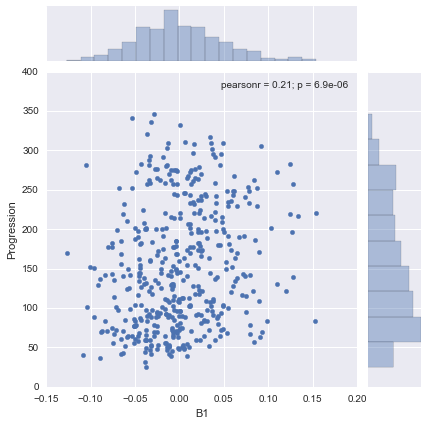

In [66]:
seaborn.jointplot(x='B1',y='Progression',data=diabetes_df)

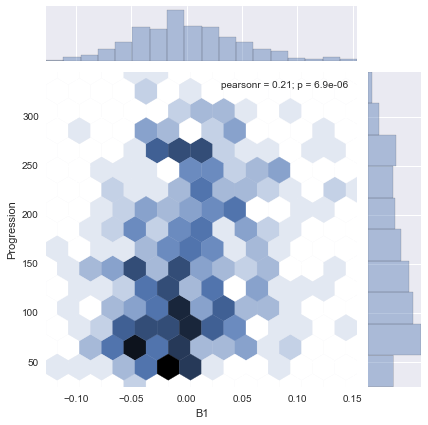

In [67]:
seaborn.jointplot(x='B1',y='Progression',kind='hex',data=diabetes_df)

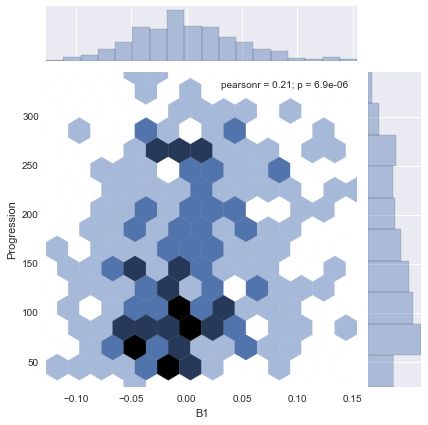

In [68]:
seaborn.jointplot(x='B1',y='Progression',kind='hex',data=diabetes_df,bins=5)

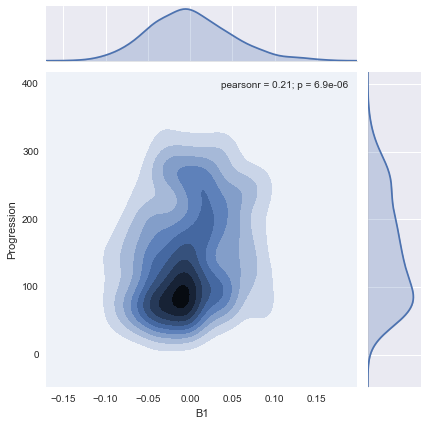

In [69]:
seaborn.jointplot(x='B1',y='Progression',kind='kde',data=diabetes_df,bins=5)

Age Axes(0.125,0.766379;0.352273x0.133621)
B1 Axes(0.547727,0.766379;0.352273x0.133621)
B2 Axes(0.125,0.606034;0.352273x0.133621)
B3 Axes(0.547727,0.606034;0.352273x0.133621)
B4 Axes(0.125,0.44569;0.352273x0.133621)
B5 Axes(0.547727,0.44569;0.352273x0.133621)
B6 Axes(0.125,0.285345;0.352273x0.133621)
BMI Axes(0.547727,0.285345;0.352273x0.133621)
BloodPressure Axes(0.125,0.125;0.352273x0.133621)
Sex Axes(0.547727,0.125;0.352273x0.133621)


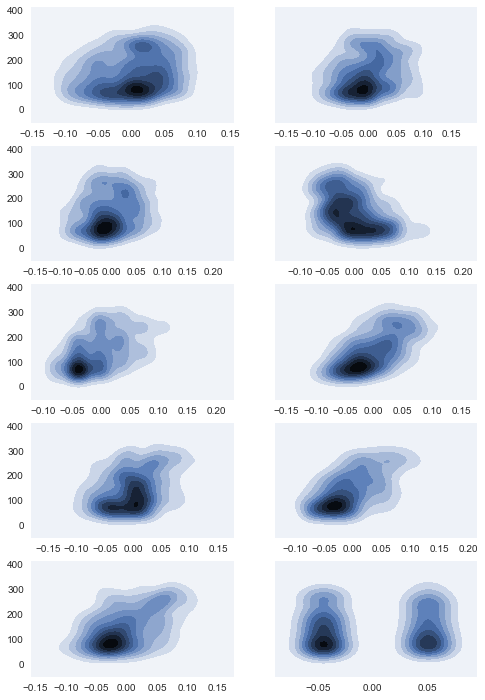

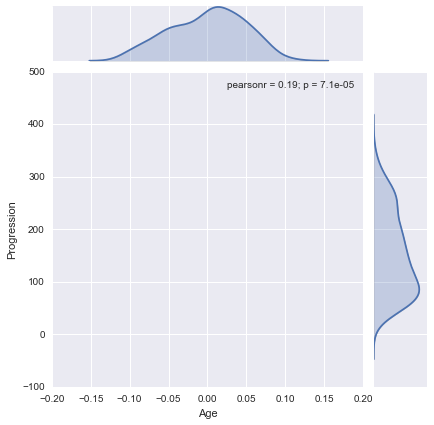

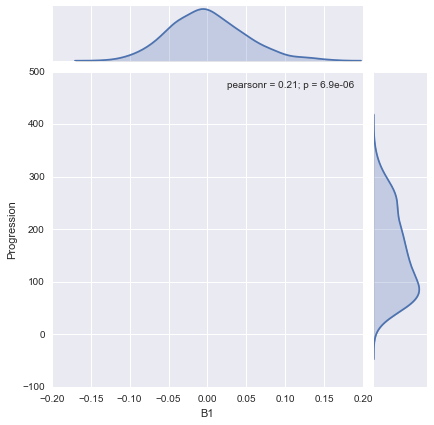

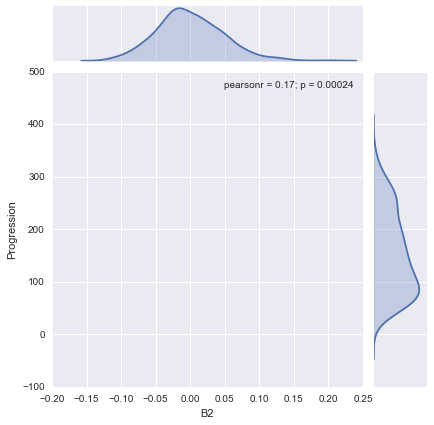

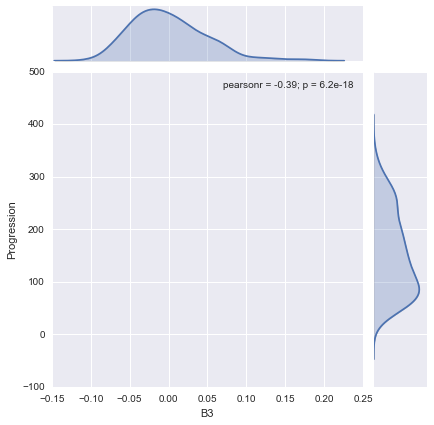

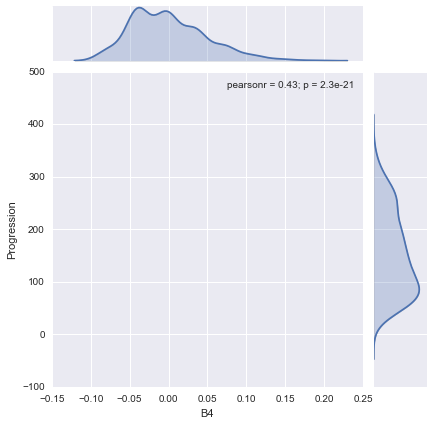

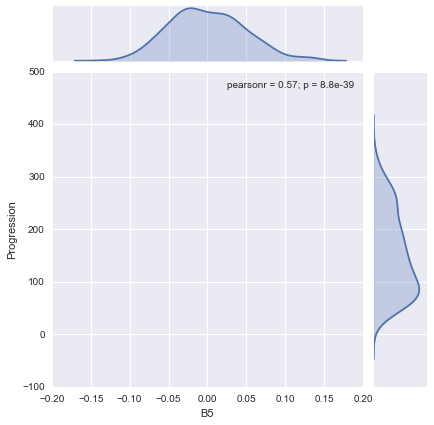

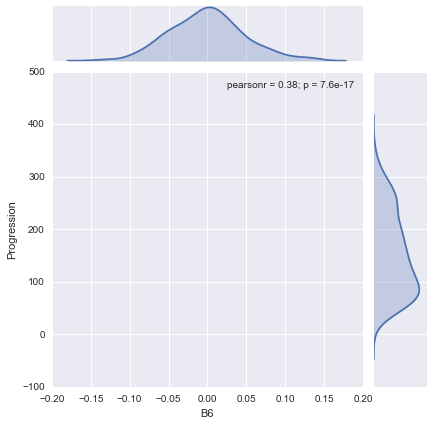

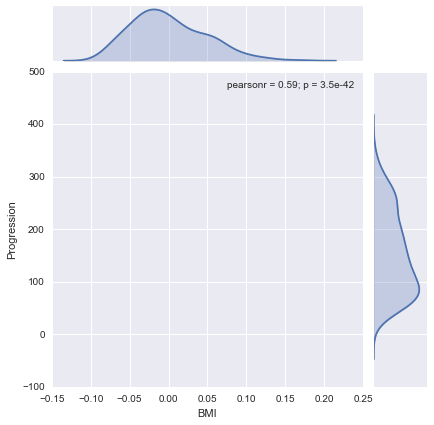

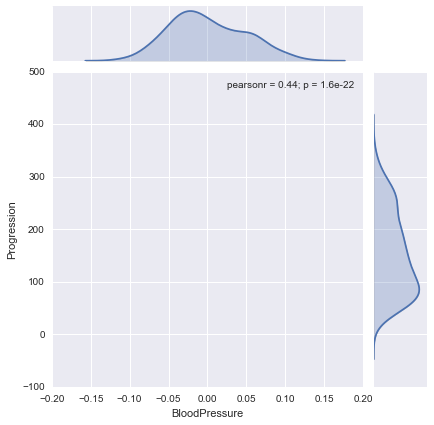

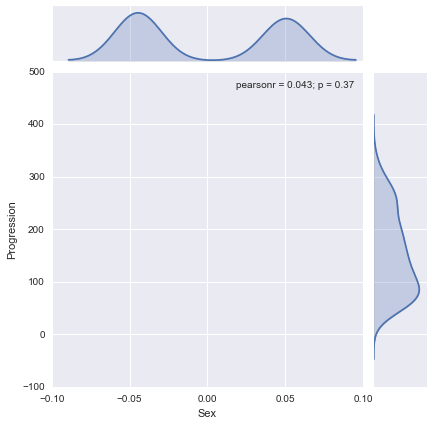

In [98]:
variables = [x for x in diabetes_df.columns if x != "Progression"]
(fig,axes) = matplotlib.pyplot.subplots(5,2,sharey=True,figsize=(8,12))
for (v,a) in zip(variables,axes.flatten()):
    print v,a
    seaborn.jointplot(x=v,y="Progression",kind='kde',data=diabetes_df, ax=a)

answer = []
for x in diabetes_df.columns:
    if x !="Progression":
        answer.append(x)

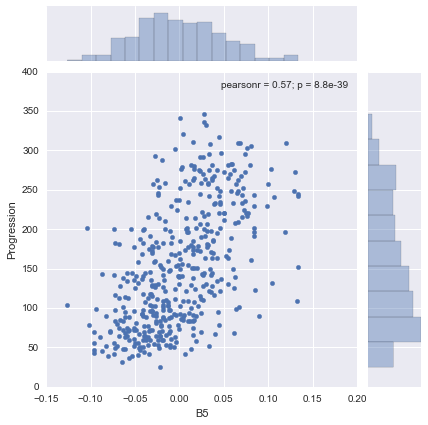

In [103]:
seaborn.jointplot(x = 'B5', y = "Progression", data=diabetes_df)


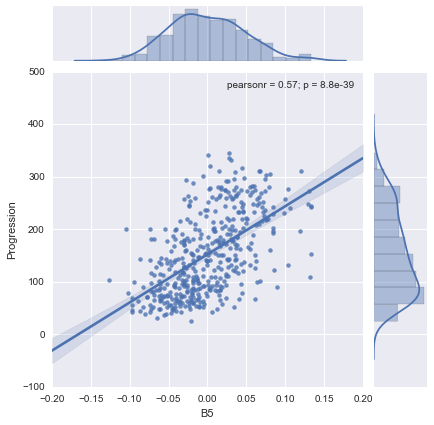

In [100]:
seaborn.jointplot(x = 'B5', y = "Progression", data=diabetes_df, kind="reg")

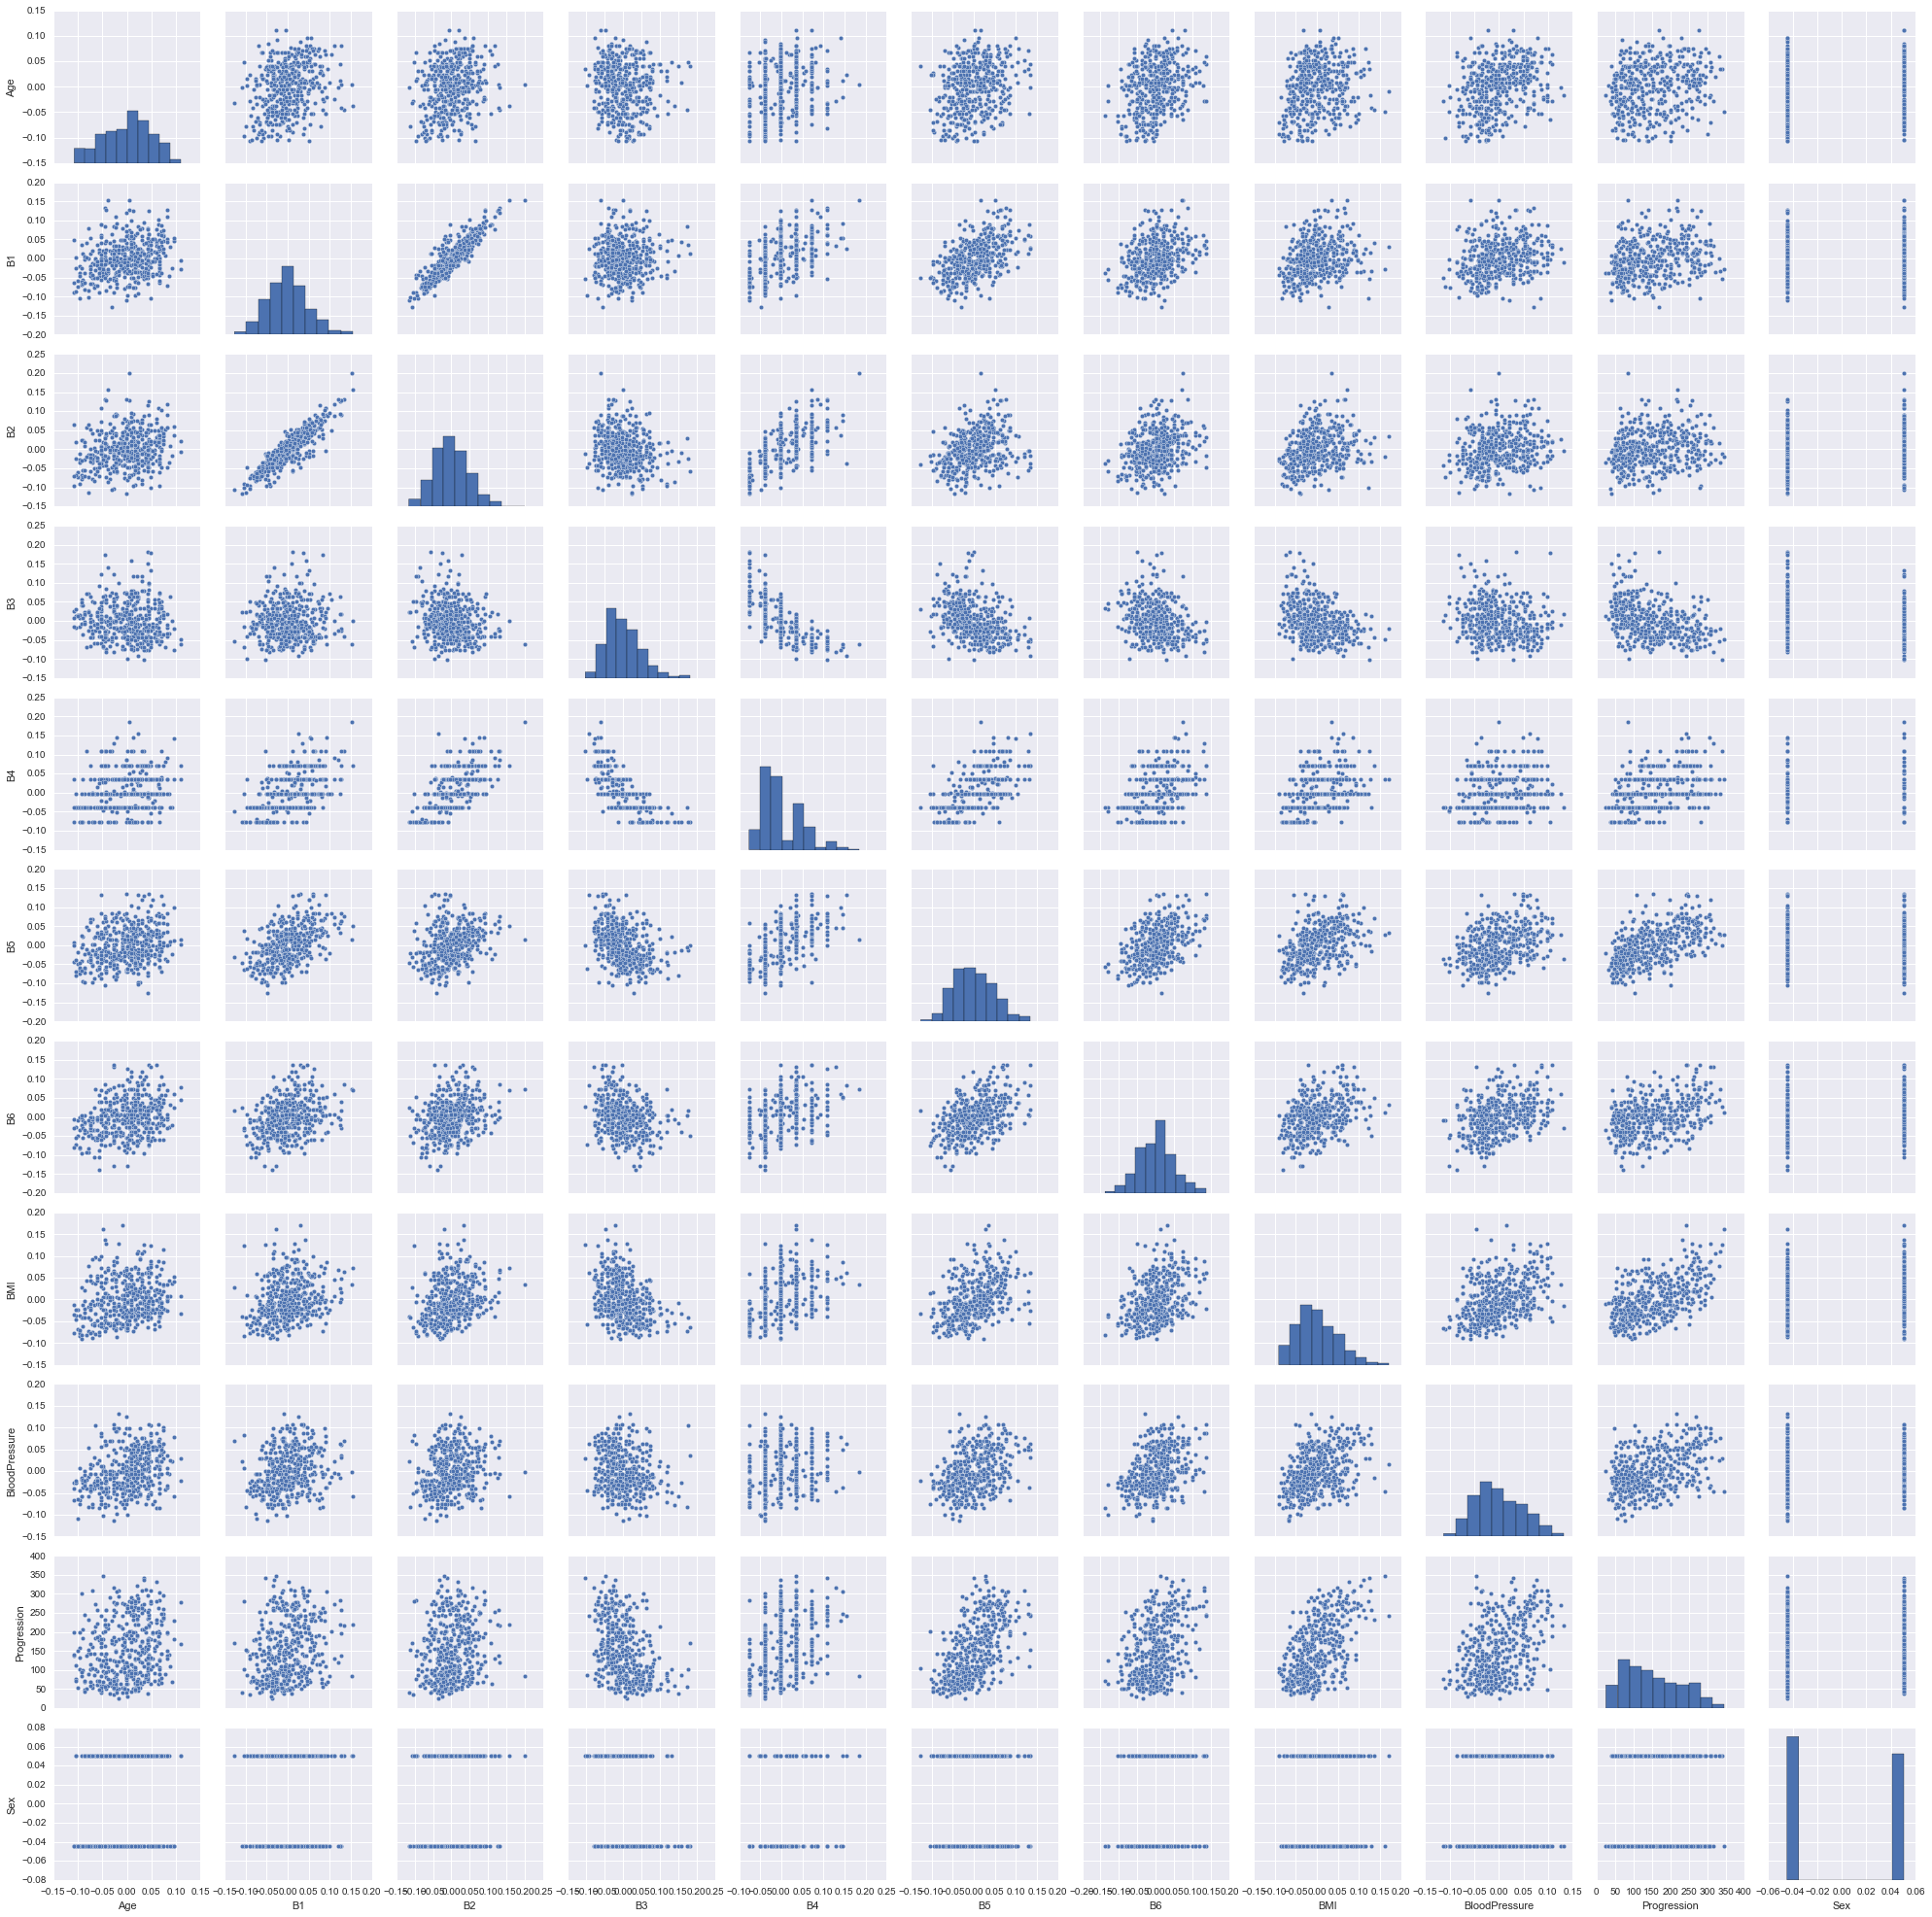

In [101]:
seaborn.pairplot(data=diabetes_df)

# categorical

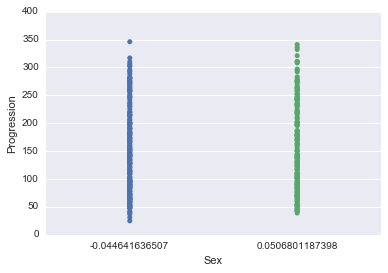

In [106]:
seaborn.stripplot(x='Sex',y="Progression",data=diabetes_df)

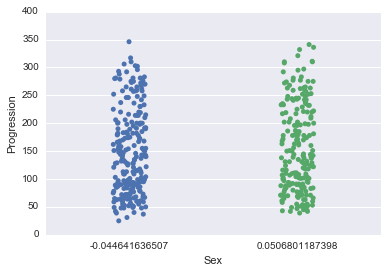

In [107]:
seaborn.stripplot(x='Sex',y="Progression",data=diabetes_df,jitter=True)

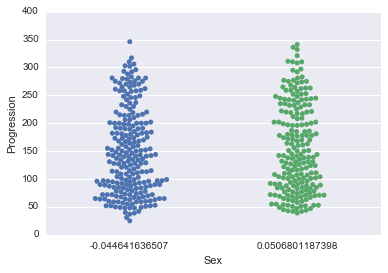

In [108]:
seaborn.swarmplot(x='Sex',y="Progression",data=diabetes_df)

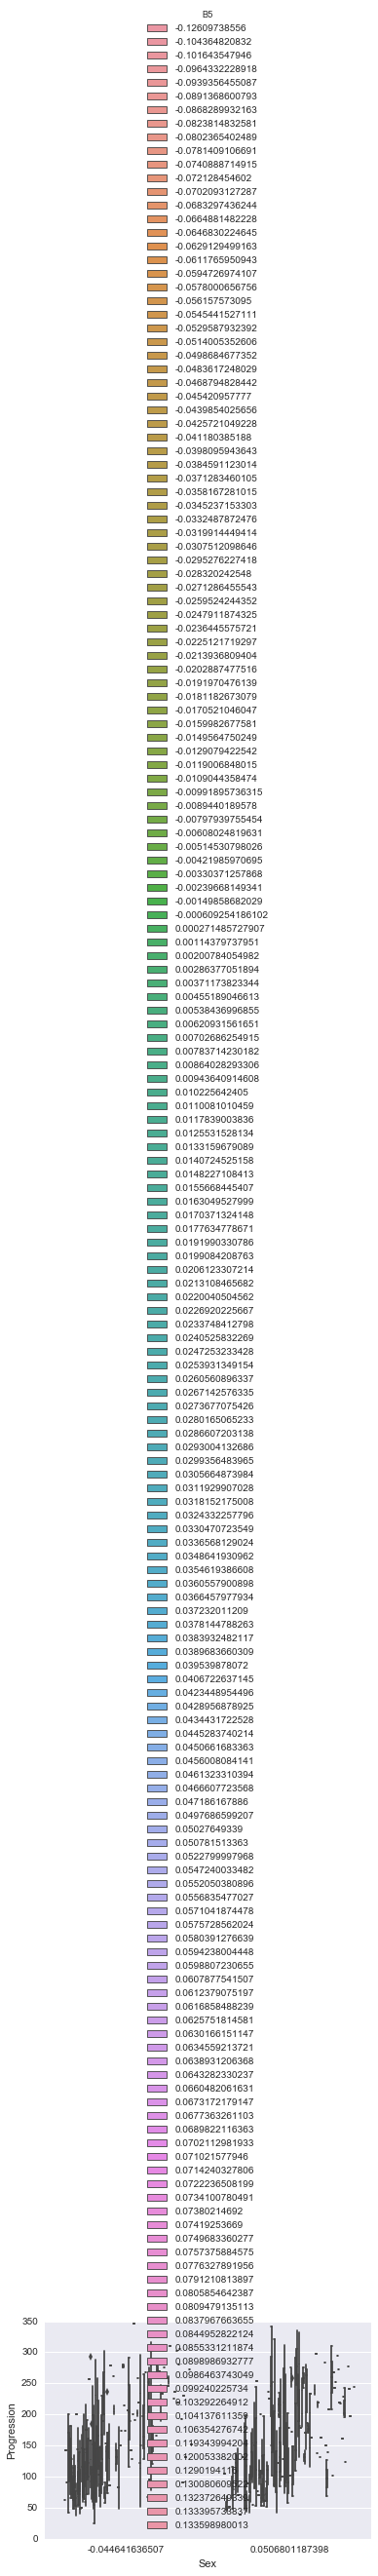

In [113]:
seaborn.boxplot(x = 'Sex', y = "Progression",data = diabetes_df, hue='B5')

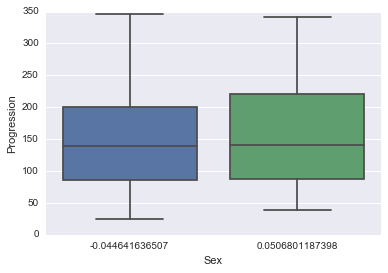

In [114]:
seaborn.boxplot(x = 'Sex', y = "Progression",data = diabetes_df)

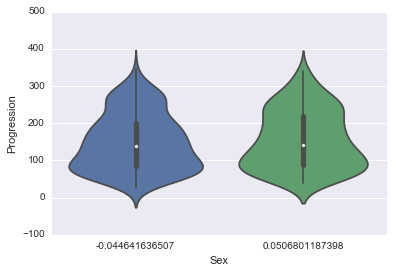

In [115]:
seaborn.violinplot(x = 'Sex', y = "Progression",data = diabetes_df)

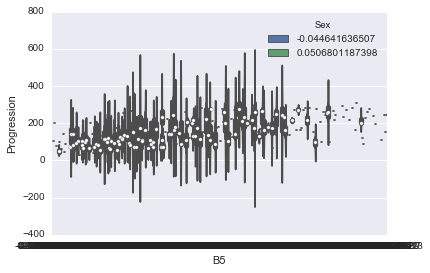

In [117]:
seaborn.violinplot(x = 'B5', y = "Progression",data = diabetes_df,hue="Sex")

In [118]:
diabetes_df['High_B5'] = diabetes_df.B5 > 0

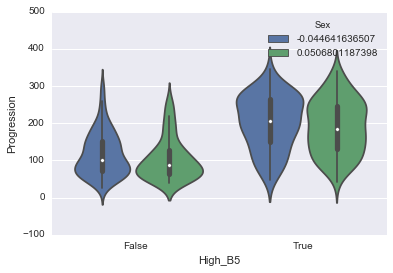

In [121]:
seaborn.violinplot(x = 'High_B5', y = "Progression",data = diabetes_df,hue="Sex")

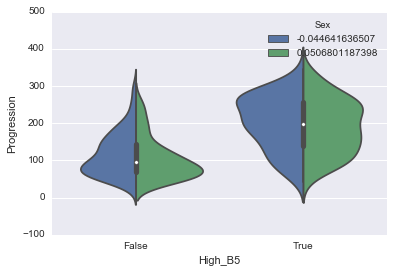

In [122]:
seaborn.violinplot(x = 'High_B5', y = "Progression",data = diabetes_df,hue="Sex",split=True)

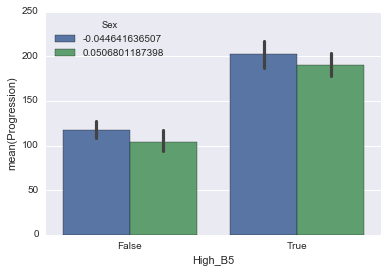

In [123]:
seaborn.barplot(x = 'High_B5', y = "Progression", data = diabetes_df,hue="Sex" )

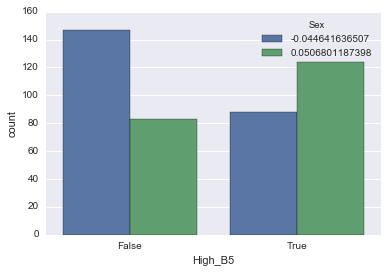

In [125]:
seaborn.countplot(x = 'High_B5', data = diabetes_df,hue="Sex" )

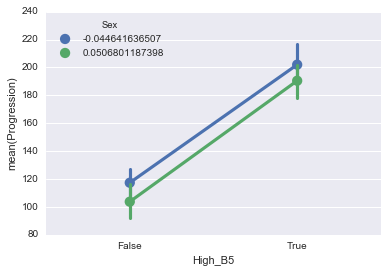

In [126]:
seaborn.pointplot(x = 'High_B5', y = "Progression", data = diabetes_df,hue="Sex" )

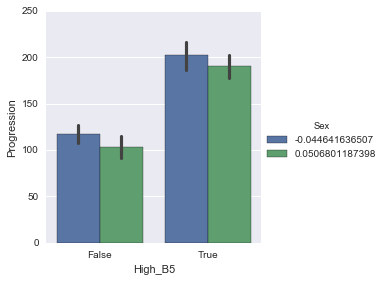

In [128]:
seaborn.factorplot(x = 'High_B5', y = "Progression", data = diabetes_df,hue="Sex", kind = 'bar' )

# linear relationships

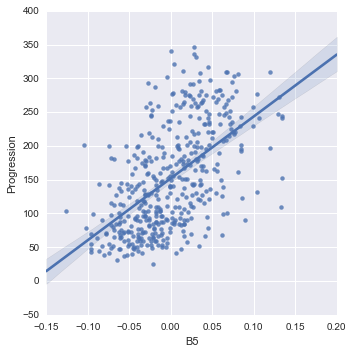

In [131]:
seaborn.lmplot(x = 'B5', y = "Progression", data=diabetes_df)

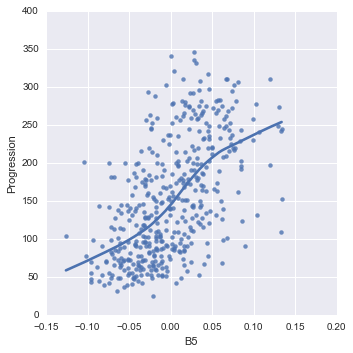

In [132]:
seaborn.lmplot(x = 'B5', y = "Progression", data=diabetes_df,lowess= True)

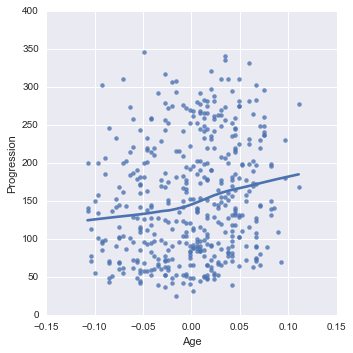

In [133]:
seaborn.lmplot(x = 'Age', y = "Progression", data=diabetes_df,lowess= True)

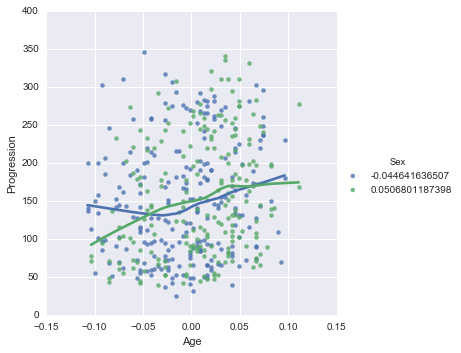

In [135]:
seaborn.lmplot(x = 'Age', y = "Progression", data=diabetes_df,lowess= True,hue="Sex")

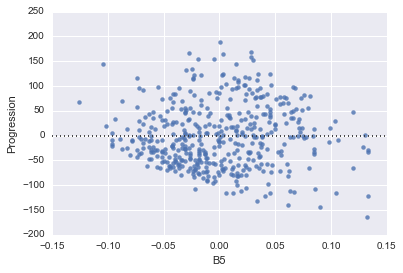

In [136]:
seaborn.residplot(x='B5', y = "Progression", data = diabetes_df)